In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
import seaborn as sns

## Plotting Heatmap

In [51]:
sum_table = pd.read_csv("/content/drive/My Drive/sum_table.csv")

In [63]:
sum_table.head()

,Biliary,Bladder,Bone,Breast,Cervix,CNS,ColoRect,Eso,Head,Kidney,...,Lymph,Myeloid,Ovary,Panc,Prost,Skin,SoftTissue,Stomach,Thy,Uterus
0,115.396429,172.961957,34.218269,68.285047,49.084375,18.745111,3826.470833,203.133929,193.769737,58.988095,...,64.233292,9.549296,105.405420,64.361580,41.664117,152.611565,61.147059,208.533333,12.919271,781.408088
1,50.512500,342.298913,22.904808,93.851928,86.384375,9.232568,93.817708,94.244898,196.530702,33.931548,...,29.974010,4.871479,82.788164,30.460890,19.250219,80.146028,43.540441,64.759167,10.414062,114.927696
2,288.666071,539.266304,55.756731,159.638435,178.768750,100.998937,2552.531250,331.404974,346.541667,94.754299,...,127.357983,35.376761,141.064159,143.469133,80.531687,6022.616822,107.294118,462.175833,33.975260,1442.904412
3,85.176786,87.347826,26.209615,39.879965,21.937500,13.413903,311.096875,164.841199,91.919956,62.851852,...,58.282488,6.919014,76.898783,39.242523,27.231643,308.074766,44.920956,158.275833,9.266927,136.058824
4,246.896429,177.994565,35.804808,53.264311,33.540625,22.117134,1571.978125,362.390944,117.452851,55.821098,...,95.947401,12.669894,96.474004,64.598543,40.420892,349.549650,57.691176,392.933333,14.486979,501.659314


In [66]:
from sklearn.preprocessing import StandardScaler

colnames = sum_table.columns

std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(sum_table.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=colnames)
df_scaled.index = ["C>A","C>G","C>T","T>A","T>C","T>G"]

<Axes: >

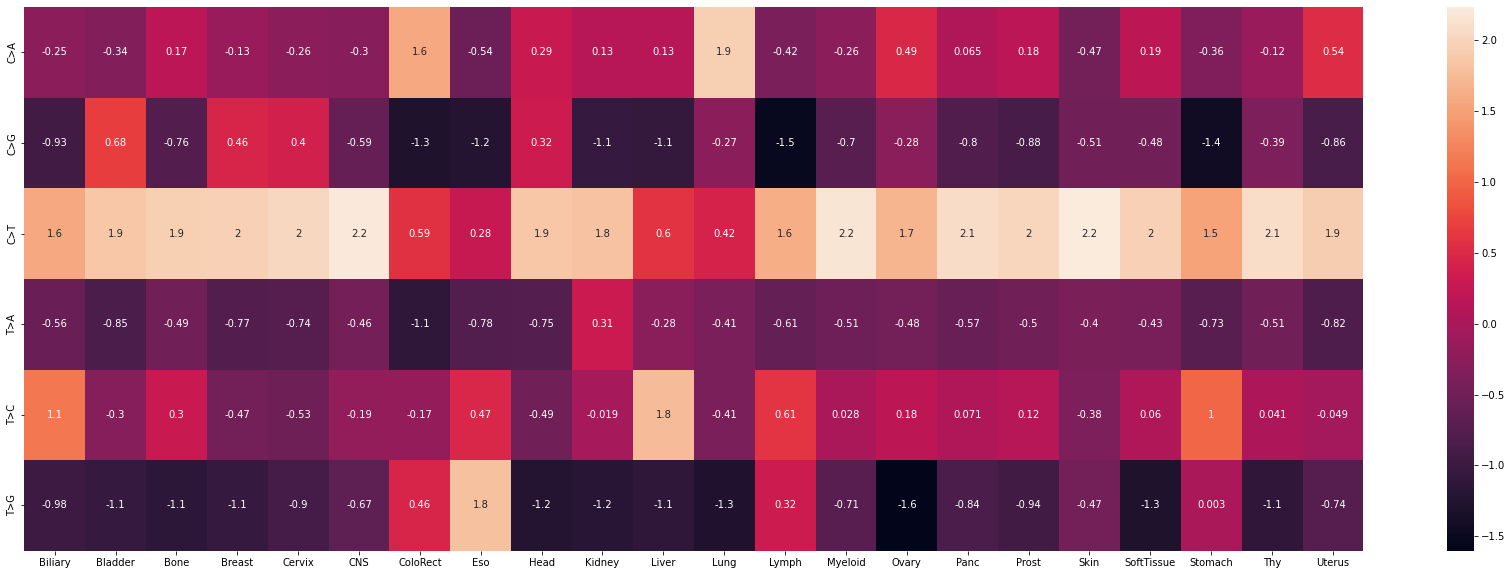

In [67]:
fig = plt.figure(figsize=(30, 10))
sns.heatmap(df_scaled, annot=True)

In [6]:
my_df = pd.read_csv("/content/drive/My Drive/my_data.csv")
my_df = my_df.iloc[: , 1:]

In [ ]:
# the following code is adapted from https://towardsdatascience.com/how-do-you-apply-pca-to-logistic-regression-to-remove-multicollinearity-10b7f8e89f9b

## Performing Logistic Regression without PCA

In [7]:
my_df.head()

,cancer_type,ACAA,ACCA,ACGA,ACTA,CCAA,CCCA,CCGA,CCTA,GCAA,...,CTGG,CTTG,GTAG,GTCG,GTGG,GTTG,TTAG,TTCG,TTGG,TTTG
0,Biliary,269,148,25,154,215,148,27,180,165,...,49,268,19,17,43,89,83,48,63,197
1,Biliary,114,56,13,70,63,49,7,69,81,...,23,53,8,5,20,15,26,10,31,64
2,Biliary,105,71,13,73,71,55,8,61,61,...,8,44,7,6,14,14,16,8,15,52
3,Biliary,217,123,29,126,129,82,26,143,162,...,43,132,21,7,28,34,38,30,53,122
4,Biliary,52,36,8,31,30,22,10,38,21,...,8,18,2,4,7,7,15,8,16,38


In [8]:
my_df = my_df.drop(labels=[667,698, 2734], axis=0)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train accuracy: 0.9954
Test accuracy: 0.7431

Test confusion_matrix


Text(33.0, 0.5, 'True')

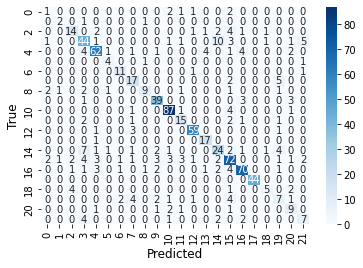

In [26]:

X = my_df.iloc[: , 1:]
y = pd.Series(my_df.iloc[:, 0])

# Make train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    shuffle=True, random_state=2)

# Initialize the logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=2500)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test) # Predictions
y_true = y_test # True values

# Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y_train, 
                                                 clf.predict(X_train)), 4))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 4))

# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [ ]:
y.unique()

## Performing PCA and Logistic Regression

Eigenvalues:
[4.55341781e+01 1.64644971e+01 8.58268967e+00 6.55200834e+00
 4.76882940e+00 3.12671086e+00 2.61470644e+00 1.47680379e+00
 1.11124273e+00 8.93776582e-01 8.35914917e-01 6.60248363e-01
 4.72975226e-01 3.53930178e-01 2.91584083e-01 2.21873780e-01
 2.02206839e-01 1.81603259e-01 1.67764686e-01 1.23671629e-01
 1.13558578e-01 1.06231430e-01 9.37990034e-02 7.85641278e-02
 7.38677675e-02 6.26403336e-02 5.77159337e-02 5.44222772e-02
 5.12647782e-02 4.72547447e-02 4.26848050e-02 4.03117507e-02
 3.63091233e-02 3.46177824e-02 3.19329148e-02 3.05598207e-02
 2.83333320e-02 2.63643873e-02 2.46132980e-02 2.28280088e-02
 2.08206386e-02 1.99896164e-02 1.73373400e-02 1.70655796e-02
 1.60457280e-02 1.54319678e-02 1.37270852e-02 1.31279073e-02
 1.22205568e-02 1.15532557e-02 1.06580580e-02 9.91561852e-03
 9.66467752e-03 9.08666471e-03 8.25486815e-03 7.89933597e-03
 7.83477537e-03 7.60456108e-03 7.22755173e-03 6.82965947e-03
 6.61519237e-03 6.33577566e-03 5.93567140e-03 5.61222033e-03
 4.95828212

Text(0, 0.5, 'Explained variance (%)')

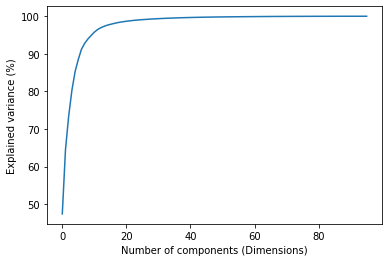

In [27]:
# Do feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X_scaled)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")


In [28]:
# Do feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Get the transformed dataset
X_pca = pd.DataFrame(X_pca)
print(X_pca.head())
print("\nSize: ")
print(X_pca.shape)

          0         1         2         3         4         5         6  \
0  1.106133 -1.051433  0.114820 -0.013190 -0.236347 -0.100287  0.232970   
1 -2.002129  0.395472 -0.161167  0.069497  0.311287 -0.249584 -0.206881   
2 -2.072608  0.446310 -0.140055  0.169414  0.456931 -0.171761 -0.156945   
3 -0.111745 -0.669773 -0.128822 -0.065788  0.410951  0.609275  0.642384   
4 -2.631910  0.422729 -0.169230 -0.057276  0.329666 -0.070706  0.168159   

          7         8         9  
0  1.146385 -0.647763  0.138320  
1  0.042363  0.128776 -0.058793  
2  0.043952  0.314289  0.016777  
3  0.139445 -0.023793 -0.014218  
4  0.268771  0.408168 -0.073660  

Size: 
(2774, 10)


<Axes: >

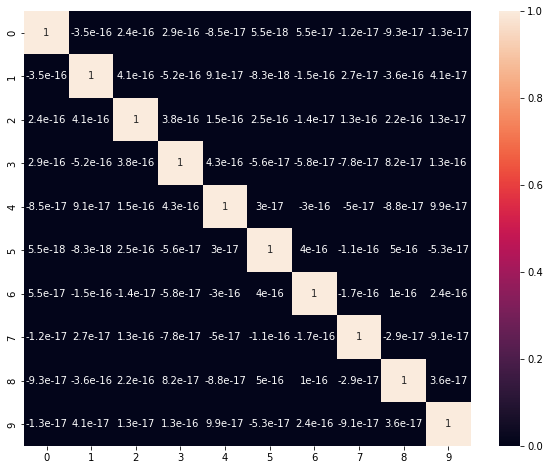

In [29]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(X_pca.corr(), 
            annot=True)

Train accuracy: 0.541
Test accuracy: 0.5282

Test confusion_matrix


Text(33.0, 0.5, 'True')

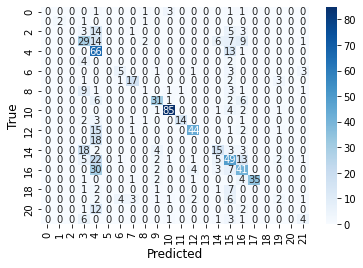

In [30]:
# Make train and test sets
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.30, 
                                                            shuffle=True, random_state=2)

# Initialize the logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=2500)

# Train the model
clf.fit(X_train_pca, y_train)

# Make predictions
y_pred = clf.predict(X_test_pca) # Predictions
y_true = y_test # True values

# Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y_train, 
                                                 clf.predict(X_train_pca)), 4))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 4))

# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [41]:
pca.explained_variance_ratio_

array([0.47414373, 0.17142426, 0.0893664 , 0.06822088, 0.0496565 ,
       0.03255668, 0.0272258 , 0.01537585, 0.01158763, 0.0093085 ,
       0.00870415, 0.0068769 , 0.00492446, 0.0036863 , 0.00303756,
       0.0023105 , 0.00211232, 0.00189132, 0.00174695, 0.00128725])

In [1]:
sum(pca.explained_variance_ratio_)

NameError: ignored